# 作業
- 作業目標 : 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [8]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

載入 相關套件 並 執行 hierarchical clustering 實驗 ...

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets

np.random.seed(5)

%matplotlib inline

In [7]:
estimators = [AgglomerativeClustering(n_clusters=3, linkage='ward'),
             AgglomerativeClustering(n_clusters=3, linkage='complete'),
             AgglomerativeClustering(n_clusters=2, linkage='average')]

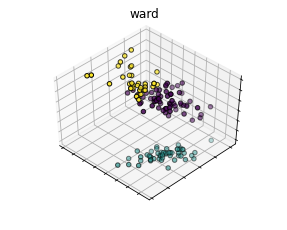

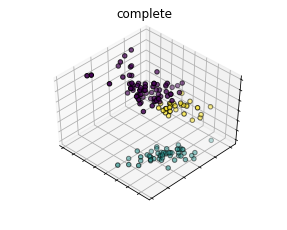

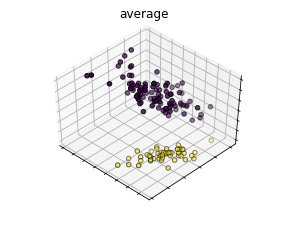

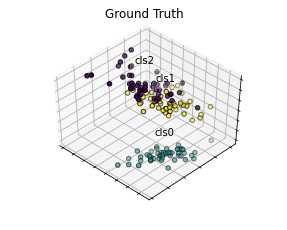

In [24]:
figum = 1
title=['ward', 'complete', 'average']

for est in estimators:
    fig = plt.figure(figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    #fit data
    est.fit(X)
    
    # 取出label
    labels = est.labels_
    
    # 畫成散布圖
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], 
              c=labels.astype(np.float), edgecolor='k')
    
    # 清除三個軸的刻度、設定標題
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])    
    ax.set_title(title[figum-1])
    ax.dist = 12
    figum += 1
                 
# Plot the ground truth
fig = plt.figure(figsize=(4, 3))        
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
                 
yy = np.choose(y,[1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=yy, edgecolor='k')
                 
for name, label in [('cls0', 0), ('cls1', 1), ('cls2', 2)]:
    ax.text3D(X[y==label, 0].mean(),
              X[y==label, 1].mean(),
              X[y==label, 2].mean()+2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
                
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12
